# Phosphoproteomics label-free

# Statistical Analysis


This notebook contains statistical analysis of phosphoproteomic dataset available in [PRIDE PXD000293](https://www.ebi.ac.uk/pride/archive/projects/PXD000293) as MaxQuant_output_Jurkat.zip.

Most of this analysis uses the output of the data processing workflow (`.pickle` file).

In [1]:
%matplotlib inline
%load_ext autoreload

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import padua
import padua.visualize as viz
import padua.analysis as analysis
import numpy as np
import os
import matplotlib.cm as cm

In [2]:
# Load and read input files
SOURCE_FILE =  r'Phospho (STY)Sites-processed.pickle'
MODIFICATION_SPECIFIC_PEPTIDES_FILE =  r'modificationSpecificPeptides.txt'
DESIGN_FILE = r'design.csv'

df = pd.read_pickle(SOURCE_FILE)
dfmsp = padua.io.read_maxquant(MODIFICATION_SPECIFIC_PEPTIDES_FILE)
design = pd.read_csv(DESIGN_FILE)

In [3]:
# Define where to save output files
SOURCE_FOLDER = os.path.dirname(SOURCE_FILE)
BASENAME = os.path.splitext(os.path.basename(SOURCE_FILE))[0]

## Phosphoenrichment

Calculate the phosphoenrichment from modificationSpecificPeptides table (output of MaxQuant), annotated with the same. The enrichment percentage is calculated for each technical replicates, and further visualized via box and bar plots.

In [4]:
%autoreload 2

# Calculation of enrichment percentage
dfr = analysis.enrichment_from_msp(dfmsp)
dfr = padua.process.build_index_from_design(dfr, design, remove_prefix=['Intensity'], types={'Timepoint':int, 'Replicate': int, 'Technical': int, 'Injection': int})
dfr.to_csv( os.path.join(SOURCE_FOLDER,  BASENAME + '-mofification-specific-peptides.csv'))
dfr

Group          Control                                                    \
Timepoint           0                                                      
Replicate            1                                                     
Technical            1         2         3         4         5         6   
% Enrichment  0.980012  0.881479  0.966781  0.978864  0.855582  0.964825   

Group                                                   ...         PGE2  \
Timepoint                                               ...           60   
Replicate            2                                  ...            1   
Technical            1         2         3         4    ...            5   
% Enrichment  0.935979  0.908079  0.838926  0.932121    ...     0.605673   

Group                                                                    \
Timepoint                                                                 
Replicate                      2                                      3   
Technical            6         2         3        5         6         1   
% Enrichment  0.968298  0.806502  0.918176  0.98569  0.957344  0.964873   

Group                                       
Timepoint                                   
Replicate                                   
Technical            3         4         6  
% Enrichment  0.961832  0.979309  0.957712  

[1 rows x 102 columns]

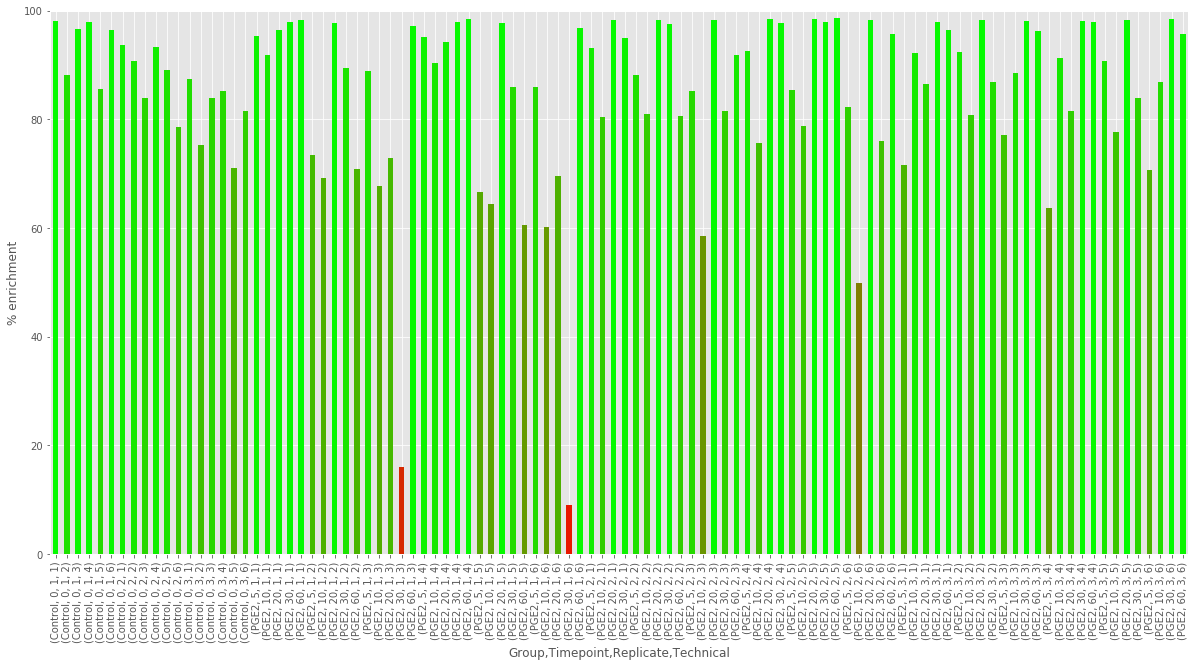

In [5]:
%autoreload 2

# Visualize phosphoenrichment per technical replicate
ax = viz.enrichment(dfr)
ax.figure.savefig( os.path.join(SOURCE_FOLDER, BASENAME + '-phosphoenrichment-all.tiff'), bbox_inches='tight', dpi=300 )

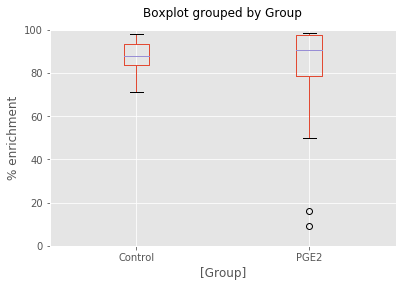

In [6]:
%autoreload 2

# Visualize phosphoenrichment per experimental group
ax = viz.enrichment(dfr, "Group")
ax.figure.savefig( os.path.join(SOURCE_FOLDER, BASENAME + '-phosphoenrichment_grouped.tiff'), bbox_inches='tight', dpi=300 )

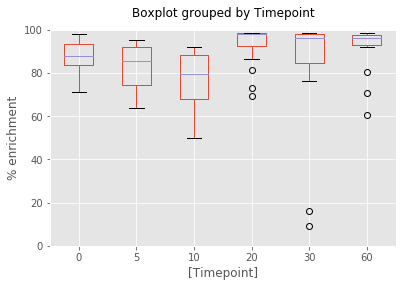

In [7]:
%autoreload 2

# Visualize phosphoenrichment per timepoint
ax = viz.enrichment(dfr, "Timepoint")
ax.figure.savefig( os.path.join(SOURCE_FOLDER, BASENAME + '-phosphoenrichment-timepoint.tiff'), bbox_inches='tight', dpi=300 )

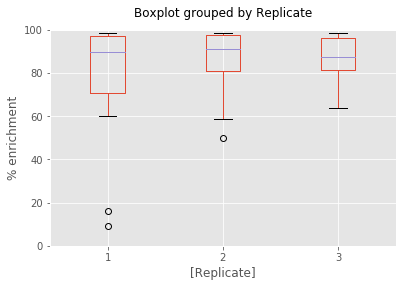

In [8]:
%autoreload 2

# Visualize phosphoenrichment per biological replicate
ax = viz.enrichment(dfr, "Replicate")
ax.figure.savefig( os.path.join(SOURCE_FOLDER, BASENAME + '-phosphoenrichment-replicate.tiff'), bbox_inches='tight', dpi=300 )

Lowest enriched samples (less than 20%) are discarded from the subsequent analysis.

In [9]:
%autoreload 2

# Eliminate technical replicates with poor enrichment
df.drop([('PGE2', 30,1,3), ('PGE2', 30,1,6)], axis=1, inplace= True)
df[('PGE2',30)]

Replicate                                                                                                                                                 1  \
Technical                                                                                                                                                 1   
id        Multiplicity Proteins                           Positions within proteins Gene names                     Amino acid Positions                       
2___1     ___1         A0AVK6                             71                        E2F8                           S          71                  -1.827758   
8___1     ___1         A0FGR8                             743                       ESYT2                          S          743                 -2.612512   
10___1    ___1         A0FGR8                             758                       ESYT2                          S          758                 -2.442048   
11___1    ___1         A0FGR8                             761                       ESYT2                          S          761                       NaN   
13___1    ___1         A0FGR8                             691                       ESYT2                          S          691                  1.829946   
17___1    ___1         A0JLT2                             226                       MED19                          S          226                 -0.237201   
25___1    ___1         A0MZ66                             506                       KIAA1598                       S          506                 -0.120512   
30___1    ___1         A1A4S6                             589                       ARHGAP10                       S          589                 -0.568584   
33___1    ___1         A1KXE4                             6                         FAM168B                        S          6                    1.207489   
36___1    ___1         A1L020                             308                       MEX3A                          S          308                 -1.275108   
37___1    ___1         A1L020                             338                       MEX3A                          S          338                       NaN   
47___1    ___1         A2RU30                             7                         TESPA1                         S          7                   -1.159192   
49___1    ___1         A2RU30                             334                       TESPA1                         S          334                 -1.079687   
50___1    ___1         A2RU30                             454                       TESPA1                         S          454                  1.338891   
53___1    ___1         A2RU67                             62                        KIAA1467                       S          62                  -2.512335   
54___1    ___1         A3KN83                             794                       SBNO1                          S          794                  1.069478   
62___1    ___1         A3KN83                             815                       SBNO1                          S          815                 -1.157582   
66___1    ___1         A4D1P6                             269                       WDR91                          S          269                 -4.178743   
67___1    ___1         A5PL33                             253                       KRBA1                          S          253                 -3.027049   
68___1    ___1         A5PL33                             493                       KRBA1                          S          493                       NaN   
72___1    ___1         A5PLL1                             228                       ANKRD34B                       S          228                 -1.458026   
73___1    ___1         A6H8Y1                             2227                      BDP1                           S          2227                 1.431523   
74___1    ___1         A6

## Phosphodistribution

Effect of PGE2 stimulation on phospho-landscape is observed by comparing number of phosphoevents happening respect to the control overtime.

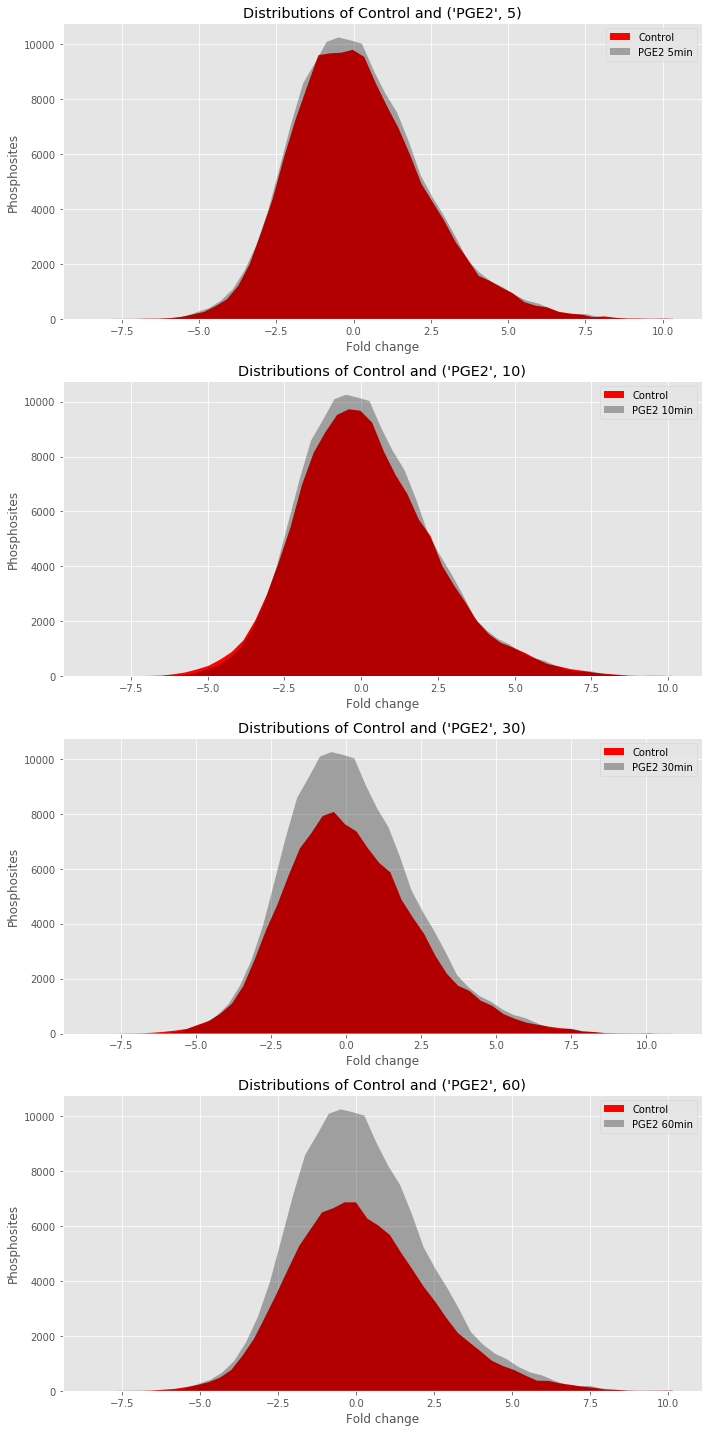

In [10]:
%autoreload 2

fig = viz.comparedist(df, 'Control', ('PGE2', 5), ('PGE2', 10), ('PGE2', 30), ('PGE2', 60),
                      xlabel='Fold change', 
                      ylabel='Phosphosites',
                      arg_fmt='{} {}min'
                     )
fig.savefig(os.path.join(SOURCE_FOLDER,  BASENAME + '-comparedist-plot.tiff'), bbox_inches='tight', dpi=300)

## Correlation plot

Correlation analysis is performed to generate a table containing Pearson correlation coefficients, which can be further visualized as heatmap.

In [11]:
%autoreload 2

# Pearson correlation coefficients' table
corr = analysis.correlation(df)
corr.to_csv( os.path.join(SOURCE_FOLDER, BASENAME + '-pearson.csv'))
corr.head(5)

Group                                   Control                                \
Timepoint                                    0                                  
Replicate                                     1                                 
Technical                                     1         2         3         4   
Group   Timepoint Replicate Technical                                           
Control 0         1         1          1.000000  0.900460  0.892937  0.859520   
                            2          0.900460  1.000000  0.866708  0.840311   
                            3          0.892937  0.866708  1.000000  0.874322   
                            4          0.859520  0.840311  0.874322  1.000000   
                            5          0.839759  0.846308  0.855244  0.927677   

Group                                                                          \
Timepoint                                                                       
Replicate                                                         2             
Technical                                     5         6         1         2   
Group   Timepoint Replicate Technical                                           
Control 0         1         1          0.839759  0.838055  0.856514  0.871949   
                            2          0.846308  0.820195  0.857960  0.877479   
                            3          0.855244  0.858213  0.859705  0.860846   
                            4          0.927677  0.942450  0.821476  0.843494   
                            5          1.000000  0.926609  0.834737  0.842160   

Group                                                        ...         PGE2  \
Timepoint                                                    ...           60   
Replicate                                                    ...            1   
Technical                                     3         4    ...            5   
Group   Timepoint Replicate Technical                        ...                
Control 0         1         1          0.892393  0.805067    ...     0.789270   
                            2          0.862203  0.815340    ...     0.751855   
                            3          0.885099  0.829319    ...     0.804085   
                            4          0.861222  0.895651    ...     0.867735   
                            5          0.831231  0.912328    ...     0.816288   

Group                                                                          \
Timepoint                                                                       
Replicate                                               2                       
Technical                                     6         2         3         5   
Group   Timepoint Replicate Technical                                           
Control 0         1         1          0.812498  0.819308  0.824871  0.807435   
                            2          0.783419  0.802604  0.807946  0.782674   
                            3          0.832622  0.830229  0.827591  0.835930   
                            4          0.879419  0.812681  0.813054  0.890749   
                            5          0.851351  0.783467  0.798330  0.863770   

Group                                                                          \
Timepoint                                                                       
Replicate                                               3                       
Technical                                     6         1         3         4   
Group   Timepoint Replicate Technical                                           
Control 0         1         1          0.813415  0.837299  0.840373  0.812333   
                            2          0.796090  0.815185  0.828322  0.796158   
                            3          0.844077  0.835771  0.834953  0.824313   
                            4          0.891547  0.842077  0.819874  0.897293   
                           

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


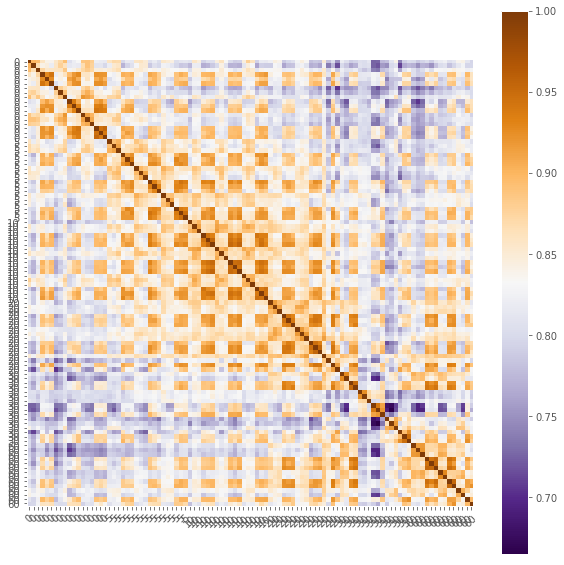

In [12]:
%autoreload 2

# The multiscatter plot pf Pearson correlation coefficients 
fig = viz.correlation(df, labels=["Timepoint"])
fig.savefig( os.path.join(SOURCE_FOLDER,  BASENAME + '-correlation-group.tiff'), bbox_inches='tight', dpi=300)

Among all techinical replicates, only 16 have a Perason coefficient correlation within the range 0.6-0.7. To reduce the effect of low quality replicates and simplify the following analysis, the median of their values is calculated by keeping the top three levels (0,1,2) of the dataframe columns (Group, Tuimepoint, Replicate), while taking a median along the remaining level 3 (Technical).

In [13]:
%autoreload 2

# Remove technical replicate by taking median along that axis
df = df.median(axis=1, level=[0,1,2])
df.to_csv( os.path.join(SOURCE_FOLDER, BASENAME + '-median.csv'))
df.head(5)

Group                                                                                    Control  \
Timepoint                                                                                     0    
Replicate                                                                                      1   
id     Multiplicity Proteins Positions within proteins Gene names Amino acid Positions             
2___1  ___1         A0AVK6   71                        E2F8       S          71        -1.454910   
8___1  ___1         A0FGR8   743                       ESYT2      S          743       -1.107104   
10___1 ___1         A0FGR8   758                       ESYT2      S          758        0.467704   
11___1 ___1         A0FGR8   761                       ESYT2      S          761       -3.250309   
13___1 ___1         A0FGR8   691                       ESYT2      S          691        0.492214   

Group                                                                                             \
Timepoint                                                                                          
Replicate                                                                                      2   
id     Multiplicity Proteins Positions within proteins Gene names Amino acid Positions             
2___1  ___1         A0AVK6   71                        E2F8       S          71        -1.012996   
8___1  ___1         A0FGR8   743                       ESYT2      S          743       -0.255396   
10___1 ___1         A0FGR8   758                       ESYT2      S          758        0.444462   
11___1 ___1         A0FGR8   761                       ESYT2      S          761       -1.606898   
13___1 ___1         A0FGR8   691                       ESYT2      S          691        1.664553   

Group                                                                                             \
Timepoint                                                                                          
Replicate                                                                                      3   
id     Multiplicity Proteins Positions within proteins Gene names Amino acid Positions             
2___1  ___1         A0AVK6   71                        E2F8       S          71        -1.143681   
8___1  ___1         A0FGR8   743                       ESYT2      S          743       -0.462542   
10___1 ___1         A0FGR8   758                       ESYT2      S          758       -0.457330   
11___1 ___1         A0FGR8   761                       ESYT2      S          761       -3.374579   
13___1 ___1         A0FGR8   691                       ESYT2      S          691        2.038123   

Group                                                                                       PGE2  \
Timepoint                                                                                     5    
Replicate                                                                                      1   
id     Multiplicity Proteins Positions within proteins Gene names Amino acid Positions             
2___1  ___1         A0AVK6   71                        E2F8       S          71        -1.373430   
8___1  ___1         A0FGR8   743                       ESYT2      S          743       -0.989975   
10___1 ___1         A0FGR8   758                       ESYT2      S          758       -0.141643   
11___1 ___1         A0FGR8   761                       ESYT2      S          761       -2.192479   
13___1 ___1         A0FGR8   691                       ESYT2      S          691        1.995918   

Group                                                                                             \
Timepoint                                                                                          
Replicate                                                                                      2   
id     Multiplicity Proteins Positions within proteins Gene names Amino acid Positions          

C:\Anaconda2\envs\py36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


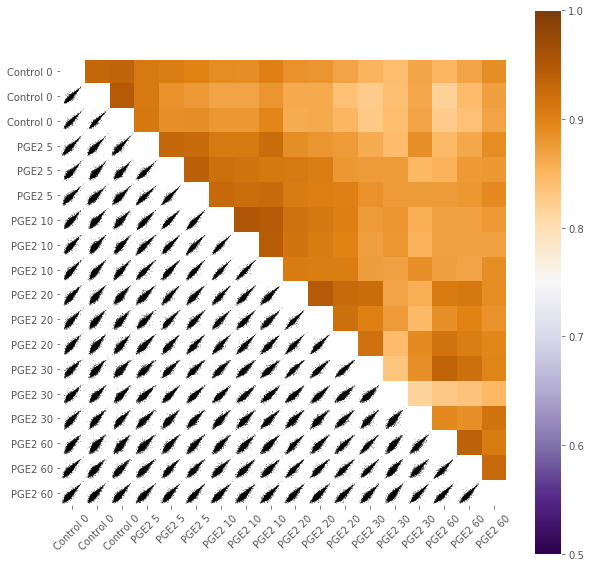

In [14]:
%autoreload 2

# Multiscatter plot containing median of techincal replicates
ax = viz.correlation(df, vmin=0.5, vmax=1, labels= ["Group","Timepoint"], show_scatter=True)
ax.savefig(os.path.join(SOURCE_FOLDER,  BASENAME + '-correlation-plot-combined-technical-replicates.tiff'), bbox_inches='tight', dpi=300)

Temporal regulation patterns are identified within the phosphodataset by first calculting sgnificantly changed phosphosites through two-sample t-test, and then peforming a hierarchical clustering.  

## Volcano Plot

C:\Anaconda2\envs\py36\lib\site-packages\padua\visualize.py:537: RuntimeWarning: Mean of empty slice
  dr = np.nanmean(g2, axis=1) - np.nanmean(g1, axis=1)


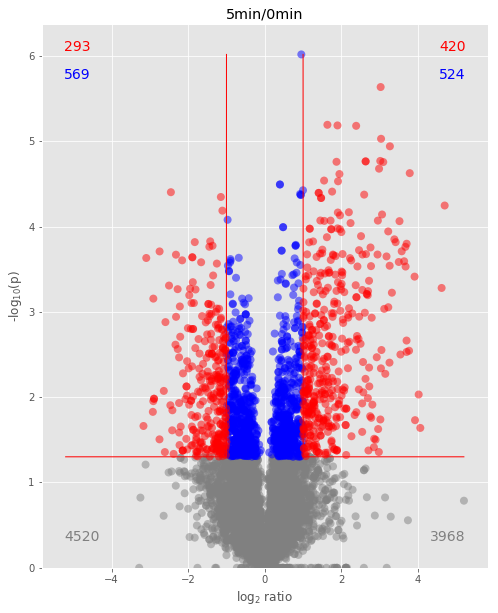

In [15]:
%autoreload 2

# Calculate phosphosites significantly regulated at 5 min
ax, p, dr, filtered_ctr_pge5 = viz.volcano(df, ('Control'), ('PGE2',5), labels_for=['Gene names','Position'], is_log2=True, title='5min/0min')

C:\Anaconda2\envs\py36\lib\site-packages\padua\visualize.py:537: RuntimeWarning: Mean of empty slice
  dr = np.nanmean(g2, axis=1) - np.nanmean(g1, axis=1)


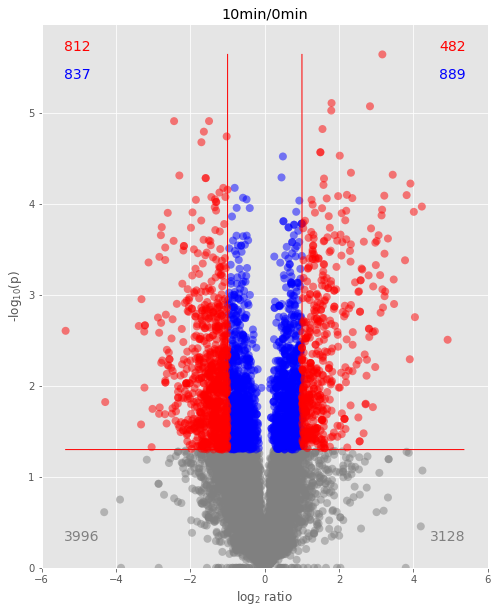

In [16]:
%autoreload 2

# Calculate phosphosites significantly regulated at 10 min
ax, p, dr, filtered_ctr_pge20 = viz.volcano(df, ('Control'), ('PGE2',10), labels_for=['Gene names','Position'], is_log2=True, title='10min/0min')

C:\Anaconda2\envs\py36\lib\site-packages\padua\visualize.py:537: RuntimeWarning: Mean of empty slice
  dr = np.nanmean(g2, axis=1) - np.nanmean(g1, axis=1)


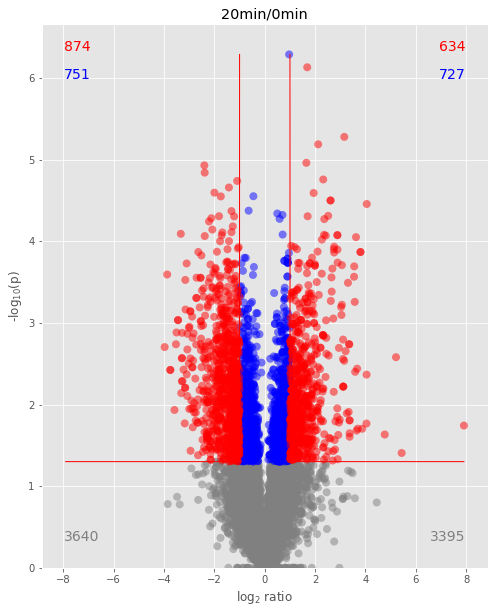

In [17]:
%autoreload 2

# Calculate phosphosites significantly regulated at 20 min
ax, p, dr, filtered_ctr_pge20 = viz.volcano(df, ('Control'), ('PGE2',20), labels_for=['Gene names','Position'], is_log2=True, title='20min/0min')

C:\Anaconda2\envs\py36\lib\site-packages\padua\visualize.py:537: RuntimeWarning: Mean of empty slice
  dr = np.nanmean(g2, axis=1) - np.nanmean(g1, axis=1)


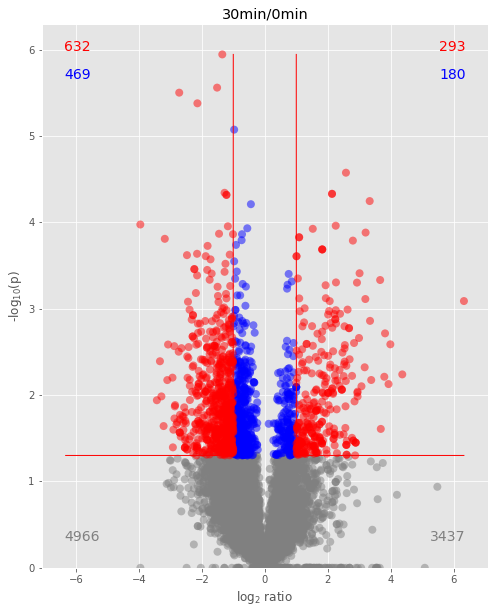

In [18]:
%autoreload 2

# Calculate phosphosites significantly regulated at 30 min
ax, p, dr, filtered_ctr_pge30 = viz.volcano(df, ('Control'), ('PGE2',30), labels_for=['Gene names','Position'], is_log2=True, title='30min/0min')

C:\Anaconda2\envs\py36\lib\site-packages\padua\visualize.py:537: RuntimeWarning: Mean of empty slice
  dr = np.nanmean(g2, axis=1) - np.nanmean(g1, axis=1)


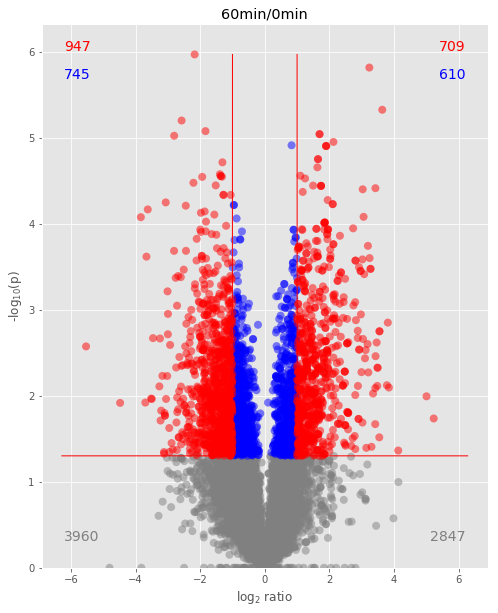

In [19]:
%autoreload 2

# Calculate phosphosites significantly regulated at 60 min
ax, p, dr, filtered_ctr_pge60 = viz.volcano(df, ('Control'), ('PGE2',60), labels_for=['Gene names','Position'], is_log2=True, title='60min/0min')

## Cluster timecourse

In [20]:
# Define color for each experiment condition
GROUP_COLORS = {
    'Control': '#636363',
    'PGE2': '#d6616b'
}

C:\Anaconda2\envs\py36\lib\site-packages\padua\visualize.py:1721: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  col_clusters = sch.linkage(col_pairwise_dists, method=method)


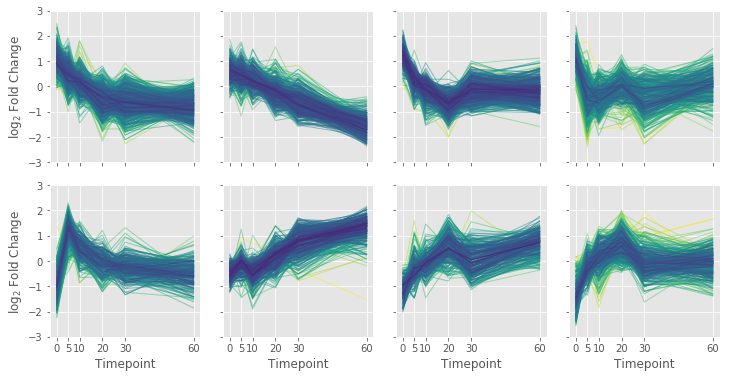

In [21]:
%autoreload 2

fig, dfh, es = viz.hierarchical_timecourse(
    df.iloc[filtered_ctr_pge5|filtered_ctr_pge20|filtered_ctr_pge30|filtered_ctr_pge60].T, 
    fcol=GROUP_COLORS, 
    n_col_clusters=8, 
    return_clusters=True,
);
fig.savefig( os.path.join(SOURCE_FOLDER,  BASENAME + '-hierarchical-cluster-timecourse-mean.tiff'), bbox_inches='tight', dpi=300 )

## GO enrichment analysis

It is possible to isolate any clusters (1,2,3,4,5,6,7,8) from the data as DataFrame (0,1,2,3,4,5,6,7) and then analyse them for GO (PantherDB) enrichments. 

In [22]:
clusters = []
# Construct a list of DataFrames, for each cluster
for n in range(len(es)-1):
    clusters.append( dfh.iloc[:,es[n]:es[n+1]].T )

In [23]:
clusters[2].to_csv( os.path.join(SOURCE_FOLDER,  BASENAME + '-cluster-3.csv') )

In [24]:
padua.analysis.go_enrichment(clusters[2], enrichment='process')

P  \
GO         Name                                                               
GO:0016070 RNA metabolic process                               1.260000e-08   
GO:0006139 nucleobase-containing compound metabolic process    2.130000e-08   
GO:0008152 metabolic process                                   1.750000e-06   
GO:0006366 transcription from RNA polymerase II promoter       1.130000e-05   
GO:0044238 primary metabolic process                           2.800000e-05   
GO:0006357 regulation of transcription from RNA polymerase...  4.060000e-05   
GO:0071840 cellular component organization or biogenesis       9.640000e-05   
GO:0044085 cellular component biogenesis                       1.800000e-04   
GO:0006807 nitrogen compound metabolic process                 2.310000e-04   
GO:0006338 chromatin remodeling                                3.190000e-04   
GO:0016072 rRNA metabolic process                              5.890000e-04   
GO:0006397 mRNA processing                                     6.690000e-04   
GO:0006351 transcription, DNA-dependent                        6.930000e-04   
GO:0006996 organelle organization                              7.800000e-04   
GO:0051726 regulation of cell cycle                            9.790000e-04   
GO:0007166 cell surface receptor signaling pathway             1.040000e-03   
GO:0016043 cellular component organization                     2.270000e-03   
GO:0015931 nucleobase-containing compound transport            3.030000e-03   
GO:0031124 mRNA 3'-end processing                              3.290000e-03   
GO:0009058 biosynthetic process                                3.500000e-03   
GO:0006457 protein folding                                     4.580000e-03   
GO:0006461 protein complex assembly                            6.340000e-03   
GO:0070271 protein complex biogenesis                          6.520000e-03   
GO:0006367 transcription initiation from RNA polymerase II...  7.360000e-03   
GO:0007049 cell cycle                                          8.920000e-03   
GO:0006378 mRNA polyadenylation                                8.980000e-03   
GO:0007186 G-protein coupled receptor signaling pathway        1.150000e-02   
GO:0050896 response to stimulus                                1.210000e-02   
GO:0007154 cell communication                                  1.210000e-02   
GO:0006403 RNA localization                                    1.290000e-02   
GO:0006325 chromatin organization                              1.300000e-02   
GO:0006368 transcription elongation from RNA polymerase II...  1.410000e-02   
GO:0007010 cytoskeleton organization                           1.480000e-02   
GO:0006412 translation                                         1.500000e-02   
GO:0051169 nuclear transport                                   1.510000e-02   
GO:0000910 cytokinesis                                         2.450000e-02   
GO:0007165 signal transduction                                 3.250000e-02   
GO:0006259 DNA metabolic process                               3.670000e-02   
GO:0044707 single-multicellular organism process               3.890000e-02   
GO:0032501 multicellular organismal process                    3.940000e-02   
GO:0009987 cellular process                                    4.070000e-02   
GO:0006796 phosphate-containing compound metabolic process     4.640000e-02   

                                                                    FDR  
GO         Name                                                          
GO:0016070 RNA metabolic process                               0.000003  
GO:0006139 nucleobase-containing compound metabolic process    0.000003  
GO:0008152 metabolic process                                   0.000142  
GO:0006366 transcription from RNA polymerase II promoter       0.000687  
GO:0044238 primary metabolic process                           0.001368  
GO:0006357 regulation of transcription from RNA polymerase...  0.001651  
GO:00

In the following more complex example, multiple GO enrichments are calculated for specific clusters (0, 3, 4; zero-indexed, or 1, 4, 5 as per the figure). The resulting `DataFrames` are annotated with cluster and enrichment labels, and then used to generate a set of figures.

Performing GO enrichment for Cluster 0 (process)
Performing GO enrichment for Cluster 0 (function)
Performing GO enrichment for Cluster 0 (cellular_location)
Performing GO enrichment for Cluster 0 (protein_class)
Performing GO enrichment for Cluster 3 (process)
Performing GO enrichment for Cluster 3 (function)
Performing GO enrichment for Cluster 3 (cellular_location)
Performing GO enrichment for Cluster 3 (protein_class)
Performing GO enrichment for Cluster 4 (process)
Performing GO enrichment for Cluster 4 (function)
Performing GO enrichment for Cluster 4 (cellular_location)
Performing GO enrichment for Cluster 4 (protein_class)


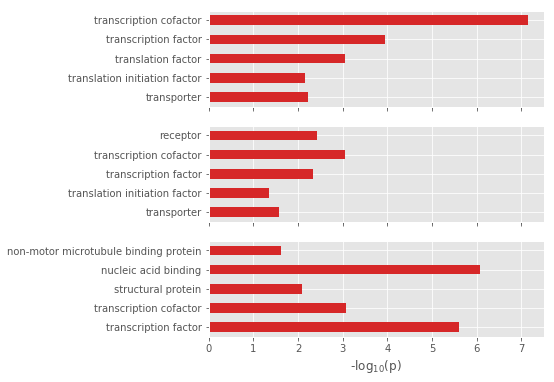

In [25]:
CLUSTER_NUMBERS = [0,3,4]

n_clusters = len(CLUSTER_NUMBERS)

fig = plt.figure(figsize=(2*n_clusters,6))
first_ax = None

GO_COLORS = {
    'process':'#1f77b4',
    'function':'#ff7f0e',
    'cellular_location':'#2ca02c',
    'protein_class':'#d62728',
}


for n, cn in enumerate(CLUSTER_NUMBERS):
    
    ax = fig.add_subplot(n_clusters,1,n+1, sharex=first_ax)
    
    c = clusters[cn]
    cluster_dfs = []
    
    for e in ['process','function', 'cellular_location','protein_class']:
        print("Performing GO enrichment for Cluster %d (%s)" % (cn, e))
        r = padua.analysis.go_enrichment(c, enrichment=e).reset_index()
        # Add cluster and enrichment type information to the GO enrichment DataFrame
        r['Enrichment'] = e
        cluster_dfs.append(r)
        
    cdf = pd.concat(cluster_dfs).set_index(['Enrichment','Name'])
    cdf = cdf.drop('GO', axis=1)
    cdf.sort_index(axis=0, inplace=True, ascending=False)
    cdf = cdf[:5]

    # Change p values to -log10(p)
    cdf['P'] = -np.log10(cdf['P'].values)

    
    colors = [GO_COLORS[e] for e in cdf.index.get_level_values(0)]
    cdf.index = cdf.index.get_level_values(1)
    
    ax = cdf.plot(kind='barh', y="P", ax=ax, legend=None, color=colors)
    ax.set_xlabel('-log$_{10}$(p)')
    ax.set_ylabel("")
    
    # Join later axes to the first; only need one scale for P
    if first_ax is None:
        first_ax = ax
        
        
fig.savefig(os.path.join(SOURCE_FOLDER,  BASENAME + '-clusters-enrichment-go.png'), bbox_inches='tight' )

# Phosphopath

In [26]:
_, significant_ctr_pge5 = padua.analysis.ttest_ind(df, 'Control', ('PGE2', 5), is_log2=True)
_, significant_ctr_pge10 = padua.analysis.ttest_ind(df, 'Control', ('PGE2', 10), is_log2=True)
_, significant_ctr_pge20 = padua.analysis.ttest_ind(df, 'Control', ('PGE2', 20), is_log2=True)
_, significant_ctr_pge30 = padua.analysis.ttest_ind(df, 'Control', ('PGE2', 30), is_log2=True)
_, significant_ctr_pge60 = padua.analysis.ttest_ind(df, 'Control', ('PGE2', 60), is_log2=True)

is_sig = ( (significant_ctr_pge5 < 0.05)  |
           (significant_ctr_pge10 < 0.05) |
           (significant_ctr_pge20 < 0.05) | 
           (significant_ctr_pge30 < 0.05) |
           (significant_ctr_pge60 < 0.05) )

In [27]:
padua.io.write_phosphopath(df[is_sig], os.path.join(SOURCE_FOLDER,  BASENAME + '-ctr-pge-significant.phos'))
v = df[is_sig][('PGE2')].mean(axis=1) / df[is_sig]['Control'].mean(axis=1)
padua.io.write_phosphopath_ratio(df[is_sig], os.path.join(SOURCE_FOLDER,  BASENAME + '-ctr-pge-ratio.txt'), ('Control',0), ('PGE2',5), ('PGE2',20), ('PGE2',30), ('PGE2',60), timepoint_idx=1)